In [22]:
from fastcore.all import *
from fastai.vision.all import *

In [23]:
path = Path('data')

In [24]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
).dataloaders(path, bs=32)

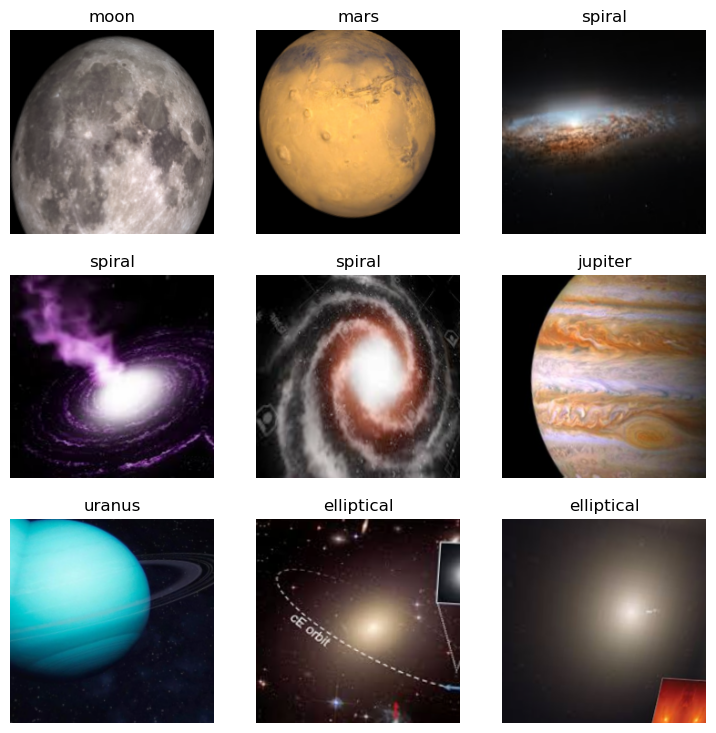

In [25]:
dls.show_batch()

In [26]:
learn = vision_learner(dls, inception_v3, metrics=error_rate)
learn.fine_tune(10)

/home/harsha/mambaforge/envs/celestial-bodies/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/harsha/mambaforge/envs/celestial-bodies/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /home/harsha/.var/app/com.jetbrains.PyCharm-Professional/cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth


  0%|          | 0.00/104M [00:00<?, ?B/s]

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 1000]

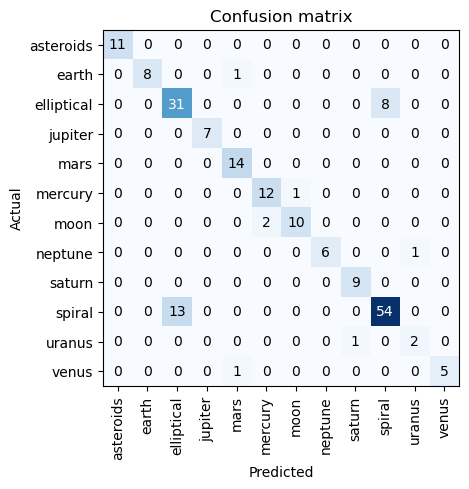

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [17]:
learn.export('celestial.pkl')

In [18]:
from PIL import Image

NameError: name 'open_image' is not defined

In [20]:
learn.predict(img)

AttributeError: 'NoneType' object has no attribute 'crop'